# Problem Statement: BlinkIt Sales Prediction and Analysis

## Business Context
BlinkIt, a quick-commerce platform, needs to optimize its sales performance across various outlets. The company has collected extensive data about its products, including item characteristics, outlet information, and historical sales data.

## Objective
To develop a machine learning model that can:
1. Accurately predict product sales across different outlets
2. Identify key factors influencing sales performance
3. Provide actionable insights for inventory management and sales optimization

## Key Challenges
- Handle missing values in critical features like Item Weight
- Address data inconsistencies in categorical variables
- Account for varying outlet characteristics and their impact on sales
- Create meaningful feature interactions to capture complex relationships
- Select the most effective model while avoiding overfitting

## Success Metrics
- Model performance measured through R², RMSE, and MAE
- Identification of top features influencing sales
- Clear insights for business decision-making

## Expected Impact
The successful implementation will help BlinkIt:
- Optimize inventory levels
- Improve outlet-specific sales strategies
- Make data-driven decisions for product placement and pricing

# Solution Approach:

## Data Preparation  
- Load and assess dataset structure  
- Identify missing values, outliers, and inconsistencies  
- Clean and standardize data:  
  - Impute missing values  
  - Treat outliers  
  - Convert types and fix categorical inconsistencies  

## Feature Engineering  
- Derive features like `Outlet_Age`, product categories, and placement metrics  
- Create interaction terms and normalized variables  
- Use domain knowledge for binary flags and grouped aggregates  

## Modeling Pipeline  
- Encode categorical variables and scale numeric features  
- Split data and build a preprocessing pipeline  
- Train multiple models:  
  - Linear (baseline)  
  - Tree-based (Random Forest, XGBoost)  
  - Ensemble methods (stacking/blending)  

## Evaluation  
- Use R², RMSE, and MAE for performance checks  
- Monitor overfitting via train-test performance gap  
- Analyze feature importance and draw business insights  

## Success Criteria  
- Achieve strong model accuracy (target R²)  
- Ensure interpretability and consistency  
- Deliver insights aligned with business objectives  

## Importing Libraries

Below are the essential libraries for data processing, visualization, and machine learning.

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization1
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing the dataset
df = pd.read_excel(r"/content/BlinkIT Grocery Data (1).xlsx")

In [3]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


## Data Type Analysis and Validation

Let's check the current data types and identify potential issues in the dataset.

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
df.info()

Dataset Shape: (8523, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ 

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_values

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


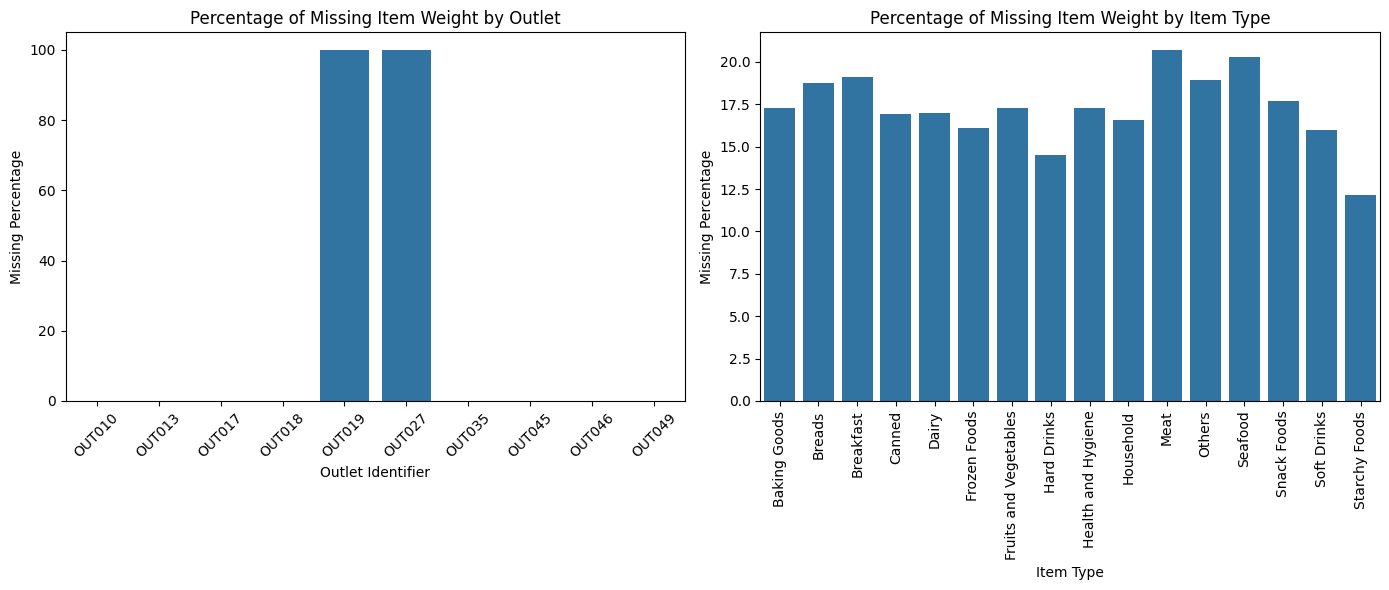

Mean Sales for items with weight data: 141.2407
Mean Sales for items without weight data: 139.7965
Difference: 1.4442

Missing Item Weights by Outlet:
Outlet Identifier
OUT027    935
OUT019    528
Name: count, dtype: int64


In [6]:
# Visualize the distribution of missing values
plt.figure(figsize=(14, 6))  # Reduced height since we're removing 2 subplots

# 1. Distribution of missing values by Outlet Identifier
plt.subplot(1, 2, 1)  # Changed from 2,2,1 to 1,2,1
missing_by_outlet = df.groupby('Outlet Identifier')['Item Weight'].apply(lambda x: x.isnull().mean() * 100)
sns.barplot(x=missing_by_outlet.index, y=missing_by_outlet.values)
plt.title('Percentage of Missing Item Weight by Outlet')
plt.xticks(rotation=45)
plt.ylabel('Missing Percentage')

# 2. Distribution of missing values by Item Type
plt.subplot(1, 2, 2)  # Changed from 2,2,2 to 1,2,2
missing_by_type = df.groupby('Item Type')['Item Weight'].apply(lambda x: x.isnull().mean() * 100)
sns.barplot(x=missing_by_type.index, y=missing_by_type.values)
plt.title('Percentage of Missing Item Weight by Item Type')
plt.xticks(rotation=90)
plt.ylabel('Missing Percentage')

plt.tight_layout()
plt.show()

# Statistical test to check if missing values are Random
has_weight = df[~df['Item Weight'].isnull()]['Sales'].mean()
no_weight = df[df['Item Weight'].isnull()]['Sales'].mean()

print(f"Mean Sales for items with weight data: {has_weight:.4f}")
print(f"Mean Sales for items without weight data: {no_weight:.4f}")
print(f"Difference: {abs(has_weight - no_weight):.4f}")

# Check if all missing values belong to the same outlet
missing_counts = df[df['Item Weight'].isnull()]['Outlet Identifier'].value_counts()
print("\nMissing Item Weights by Outlet:")
print(missing_counts)

In [7]:
# Check for inconsistencies in categorical columns

# Item Fat Content inconsistency check
print("Unique values in 'Item Fat Content':")
print(df['Item Fat Content'].value_counts())
print("\ninconsistency: 'Regular'/'reg' and 'Low Fat'/'low fat'")

# Check other categorical columns
print("\nUnique values in 'Item Type':")
print(df['Item Type'].value_counts())

print("\nUnique values in 'Outlet Size':")
print(df['Outlet Size'].value_counts())

print("\nUnique values in 'Outlet Type':")
print(df['Outlet Type'].value_counts())

Unique values in 'Item Fat Content':
Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

inconsistency: 'Regular'/'reg' and 'Low Fat'/'low fat'

Unique values in 'Item Type':
Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Unique values in 'Outlet Size':
Outlet Size
Medium    3631
Small     3139
High      1753
Name: count, dtype: int64

Unique values in 'Outlet Type':
Outlet Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     93

In [8]:
# Check for potential issues in numerical columns

# Statistics for numerical columns
numerical_cols = ['Item Visibility', 'Item Weight', 'Sales', 'Rating', 'Outlet Establishment Year']
print(df[numerical_cols].describe())

# Check for zero or negative values in Item Visibility
print("\nCount of zero values in Item Visibility:", (df['Item Visibility'] == 0).sum())
print("Count of negative values in Item Visibility:", (df['Item Visibility'] < 0).sum())

# Check if Outlet Establishment Year is within a reasonable range
print("\nUnique Outlet Establishment Years:")
print(sorted(df['Outlet Establishment Year'].unique()))

       Item Visibility  Item Weight        Sales       Rating  \
count      8523.000000  7060.000000  8523.000000  8523.000000   
mean          0.066132    12.857645   140.992783     3.965857   
std           0.051598     4.643456    62.275067     0.605651   
min           0.000000     4.555000    31.290000     1.000000   
25%           0.026989     8.773750    93.826500     4.000000   
50%           0.053931    12.600000   143.012800     4.000000   
75%           0.094585    16.850000   185.643700     4.200000   
max           0.328391    21.350000   266.888400     5.000000   

       Outlet Establishment Year  
count                8523.000000  
mean                 2016.450546  
std                     3.189396  
min                  2011.000000  
25%                  2014.000000  
50%                  2016.000000  
75%                  2018.000000  
max                  2022.000000  

Count of zero values in Item Visibility: 526
Count of negative values in Item Visibility: 0

Uniqu

## Recommended Data Type Corrections

Based on the analysis, here are the data type issues that should be addressed:

In [9]:
# Function to correct data type issues
def correct_data_types(df):
    # Create a copy to avoid modifying the original dataframe
    df_corrected = df.copy()

    # 1. Standardize Item Fat Content values
    fat_content_mapping = {
        'low fat': 'Low Fat',
        'LF': 'Low Fat',
        'reg': 'Regular'
    }
    df_corrected['Item Fat Content'] = df_corrected['Item Fat Content'].replace(fat_content_mapping)

    # 2. Handle missing values in Item Weight
    df_corrected['Item Weight'].fillna(df_corrected['Item Weight'].median(), inplace=True)

    # 3. Convert Outlet Establishment Year to categorical (if it's used as a category rather than a date)
    df_corrected['Outlet Establishment Year'] = df_corrected['Outlet Establishment Year'].astype('category')

    # 4. Fix zero visibility values (if they're errors)
    # Option: Replace zeros with the mean of non-zero values
    mean_visibility = df_corrected.loc[df_corrected['Item Visibility'] > 0, 'Item Visibility'].mean()
    df_corrected.loc[df_corrected['Item Visibility'] == 0, 'Item Visibility'] = mean_visibility

    return df_corrected

# Create corrected dataframe
df_corrected = correct_data_types(df)

# Check the results
print("After correction:")
print("\nUnique values in 'Item Fat Content':")
print(df_corrected['Item Fat Content'].value_counts())

print("\nMissing values after correction:")
print(df_corrected.isnull().sum())

print("\nZero values in Item Visibility after correction:", (df_corrected['Item Visibility'] == 0).sum())

After correction:

Unique values in 'Item Fat Content':
Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Missing values after correction:
Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

Zero values in Item Visibility after correction: 0


<ipython-input-9-7083c3336e57>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corrected['Item Weight'].fillna(df_corrected['Item Weight'].median(), inplace=True)


## Summary of Data Type Issues

1. **Item Fat Content**: Contains inconsistent values ('Regular'/'reg' and 'Low Fat'/'low fat')
2. **Item Weight**: Has missing values (1,463 nulls, approximately 17.2%)
3. **Item Visibility**: Contains zero values which may be errors
4. **Outlet Establishment Year**: Currently stored as integer but might be better as categorical

These issues have been addressed in the correction function above. You can use the corrected dataframe for further analysis.

## Data Exploration

Explore structure, missing values, and distribution of variables. Determine the target variable for regression.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item Fat Content           8523 non-null   object  
 1   Item Identifier            8523 non-null   object  
 2   Item Type                  8523 non-null   object  
 3   Outlet Establishment Year  8523 non-null   category
 4   Outlet Identifier          8523 non-null   object  
 5   Outlet Location Type       8523 non-null   object  
 6   Outlet Size                8523 non-null   object  
 7   Outlet Type                8523 non-null   object  
 8   Item Visibility            8523 non-null   float64 
 9   Item Weight                8523 non-null   float64 
 10  Sales                      8523 non-null   float64 
 11  Rating                     8523 non-null   float64 
dtypes: category(1), float64(4), object(7)
memory usage: 741.3+ KB


Text(0.5, 1.0, 'Distribution of Sales')

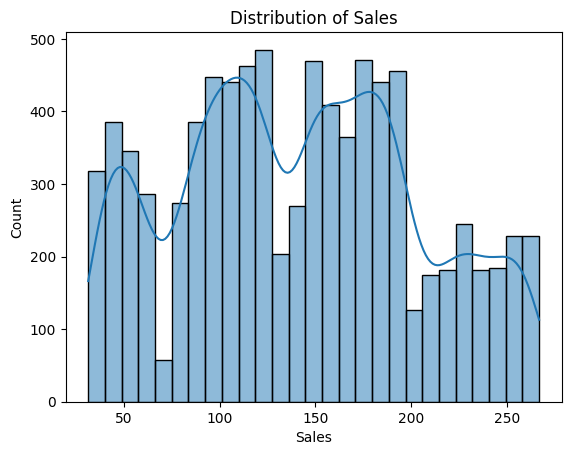

In [10]:
# Initial exploration
df_corrected.head()
df_corrected.info()
df_corrected.describe()

# Distribution of target 'Sales'
import seaborn as sns
sns.histplot(df_corrected['Sales'], kde=True)
plt.title('Distribution of Sales')

## Data Cleaning

outliers, and ensure correct data types.

In [11]:
# Impute missing Item Weight with median
df_clean = df_corrected.copy()

# Remove extreme outliers in Item Visibility
df_clean = df_clean[df_clean['Item Visibility'] <= 0.3]

# Verify no missing values remain
df_clean.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


In [12]:
import pandas as pd

# Select only numeric columns
numeric_cols = df_clean.select_dtypes(include='number').columns

# Dictionary to store outlier info
outlier_summary = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    # Save results
    outlier_summary[col] = {
        'outlier_count': outliers.shape[0],
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Display summary
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df.sort_values('outlier_count', ascending=False))


                 outlier_count  lower_bound  upper_bound
Rating                  1930.0      3.70000     4.500000
Item Visibility          165.0     -0.05894     0.186417
Item Weight                0.0     -0.75000    26.050000
Sales                      0.0    -43.89930   323.369500


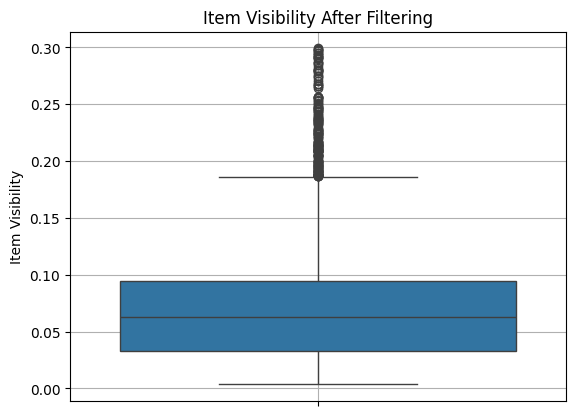

In [13]:
sns.boxplot(y=df_clean[df_clean['Item Visibility'] <= 0.3]['Item Visibility'])
plt.title('Item Visibility After Filtering')
plt.ylabel('Item Visibility')
plt.grid(True)
plt.show()


In [14]:
import pandas as pd

# List of columns you want to check for outliers
cols_to_clean = ['Item Visibility', 'Item Weight', 'Sales']

for col in cols_to_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Reset index
df_clean.reset_index(drop=True, inplace=True)

print("Outliers removed using IQR method. New shape:", df_clean.shape)


Outliers removed using IQR method. New shape: (8346, 12)


<ipython-input-15-0660c2e151f3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


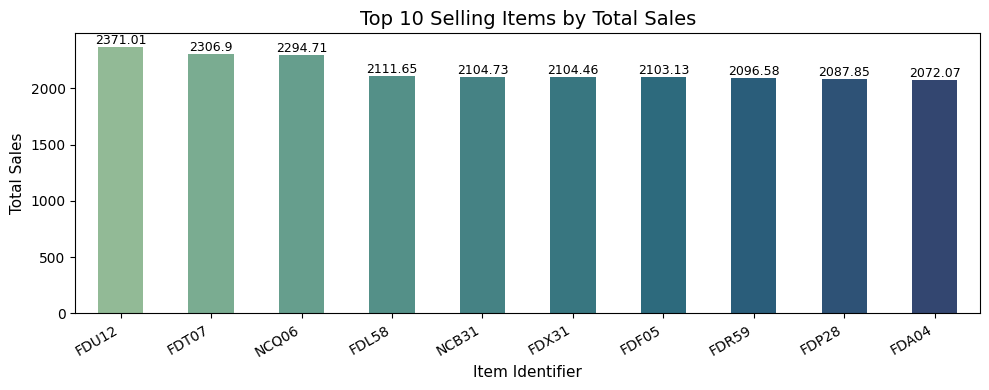

In [15]:
# Improved: Identifying Top Selling Items

top_selling_items = (
    df.groupby('Item Identifier', as_index=False)['Sales']
      .sum()
      .sort_values(by='Sales', ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 4))  # Slimmer and wider
ax = sns.barplot(
    x='Item Identifier',
    y='Sales',
    data=top_selling_items,
    palette='crest',           # Changed color palette
    width=0.5                  # Slimmer bars
)
ax.set_title('Top 10 Selling Items by Total Sales', fontsize=14)
ax.set_xlabel('Item Identifier', fontsize=11)
ax.set_ylabel('Total Sales', fontsize=11)
plt.xticks(rotation=30, ha='right')

for bars in ax.containers:
    ax.bar_label(bars, fontsize=9)

plt.tight_layout()
plt.show()

<ipython-input-16-b786f2d93e8c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


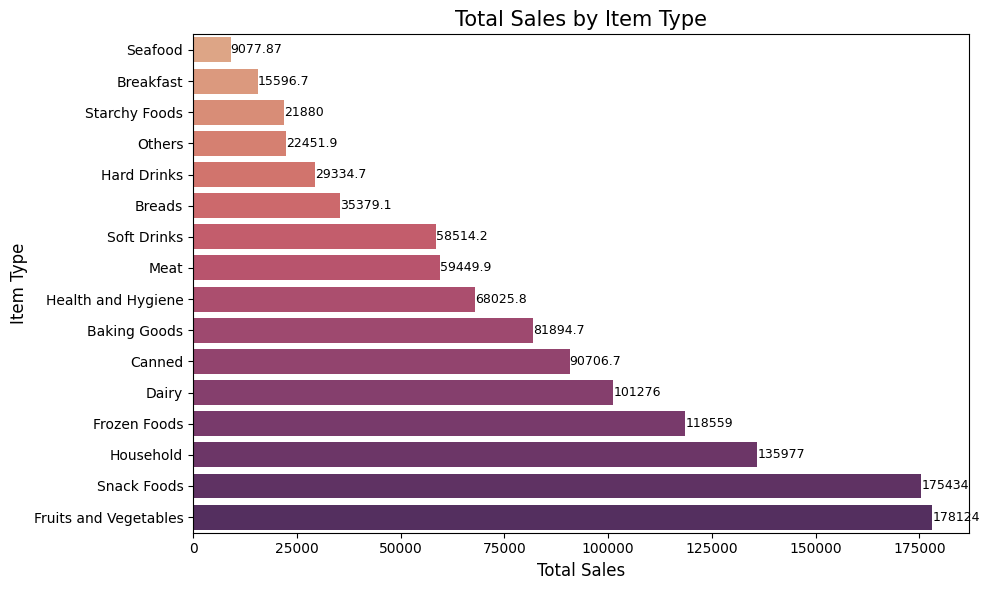

In [16]:
# Total Sales by Item Type using a horizontal bar plot

item_type_sales = (
    df.groupby('Item Type', as_index=False)['Sales']
      .sum()
      .sort_values(by='Sales', ascending=True)  # ascending for horizontal bar plot
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y='Item Type',
    x='Sales',
    data=item_type_sales,
    palette='flare'
)
ax.set_title('Total Sales by Item Type', fontsize=15)
ax.set_xlabel('Total Sales', fontsize=12)
ax.set_ylabel('Item Type', fontsize=12)
for bars in ax.containers:
    ax.bar_label(bars, fontsize=9)
plt.tight_layout()
plt.show()

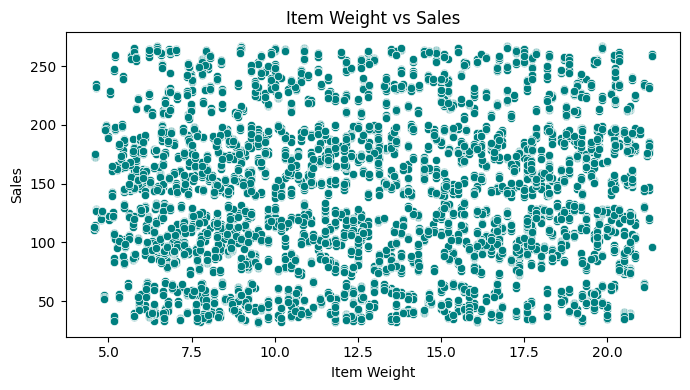

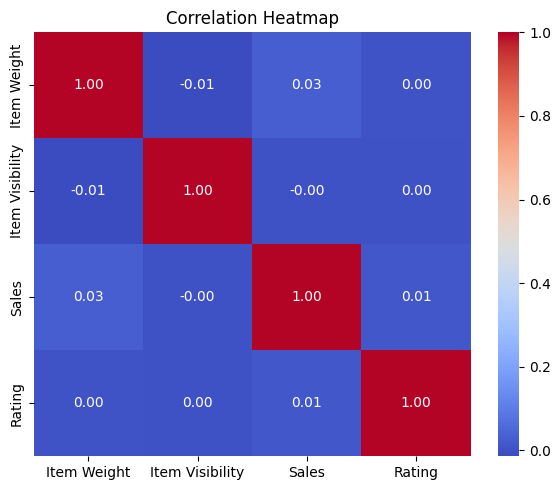

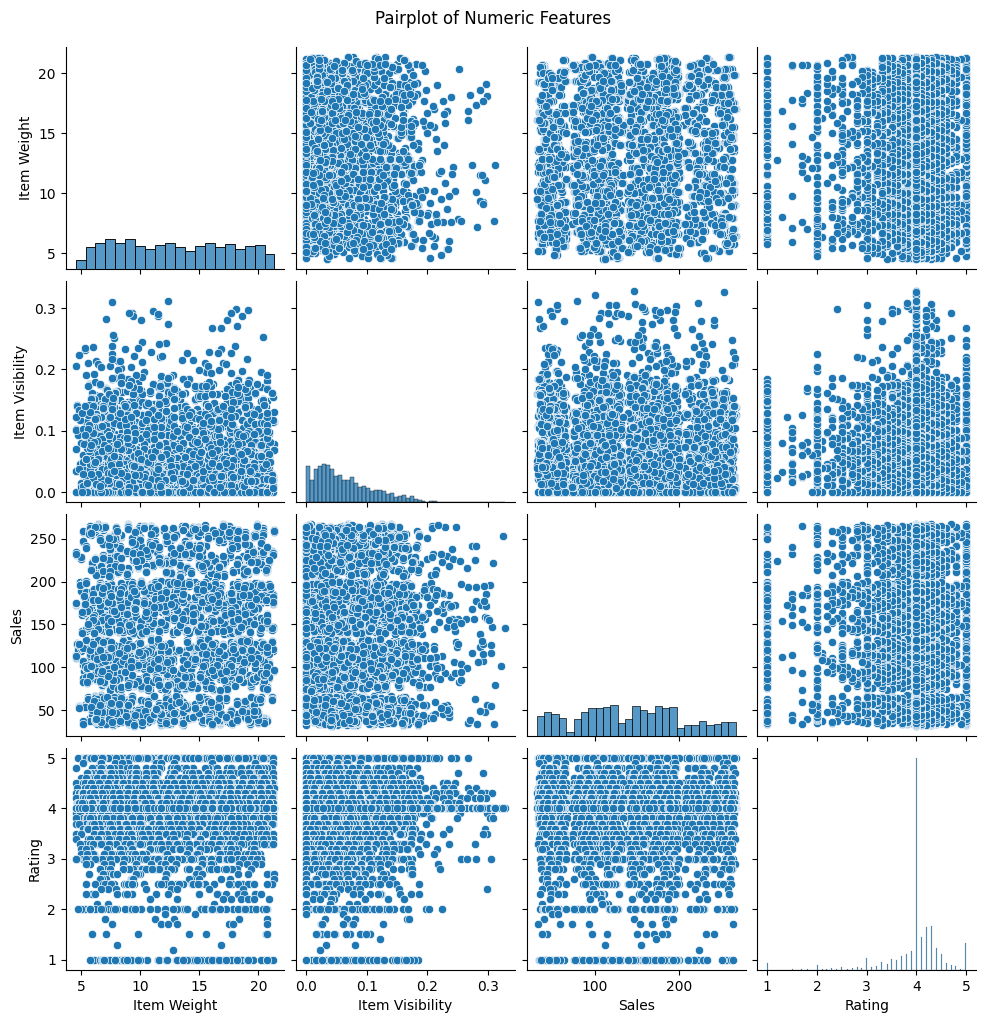

In [17]:
# Visualizing relationships between columns using different graph types

# 1. Scatter plot: Item Weight vs Sales
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Item Weight', y='Sales', data=df, color='teal')
plt.title('Item Weight vs Sales')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()




# 4. Heatmap: Correlation between numeric features
plt.figure(figsize=(6, 5))
corr = df[['Item Weight', 'Item Visibility', 'Sales', 'Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 4. Pairplot: Numeric relationships
sns.pairplot(df[['Item Weight', 'Item Visibility', 'Sales', 'Rating']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

## Enhanced Feature Engineering

Creating new features without using the target variable to avoid data leakage.

New features include:
1. Item Price To Weight Ratio
2. Outlet Age (based on establishment year)
3. Item Visibility Normalized by Item Type
4. Outlet Performance Metrics
5. Item Category Features
6. Interaction Features

In [18]:
# Copying the cleaned dataset for feature engineering
df_with_features = df_clean.copy()

# Calculating outlet age
df_with_features['Outlet Establishment Year'] = pd.to_numeric(df_with_features['Outlet Establishment Year'], errors='coerce')
current_year = 2025
df_with_features['Outlet_Age'] = current_year - df_with_features['Outlet Establishment Year']

# Normalizing item visibility
avg_visibility = df_with_features.groupby('Item Type')['Item Visibility'].transform('mean')
df_with_features['Item_Visibility_Normalized'] = df_with_features['Item Visibility'] / avg_visibility
df_with_features['Item_Visibility_Normalized'].replace([np.inf, -np.inf], 0, inplace=True)
df_with_features['Item_Visibility_Normalized'].fillna(1, inplace=True)

# Food and perishable flags
food_items = ['Fruits and Vegetables', 'Snack Foods', 'Breakfast', 'Seafood',
              'Meat', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
              'Hard Drinks', 'Soft Drinks', 'Starchy Foods', 'Breads']
df_with_features['Is_Food'] = df_with_features['Item Type'].apply(lambda item: 1 if item in food_items else 0)

perishables = ['Fruits and Vegetables', 'Meat', 'Seafood', 'Dairy', 'Frozen Foods']
df_with_features['Is_Perishable'] = df_with_features['Item Type'].apply(lambda item: 1 if item in perishables else 0)

# Low fat + food interaction
df_with_features['Fat_X_Food'] = (df_with_features['Item Fat Content'] == 'Low Fat') * df_with_features['Is_Food']

# Outlet type numeric + interaction
outlet_type_dict = {
    'Grocery Store': 1,
    'Supermarket Type1': 2,
    'Supermarket Type2': 3,
    'Supermarket Type3': 4
}
df_with_features['Outlet_Type_Numeric'] = df_with_features['Outlet Type'].map(outlet_type_dict)
df_with_features['Visibility_X_Outlet_Type'] = df_with_features['Item Visibility'] * df_with_features['Outlet_Type_Numeric']

# Display new features
print("New features created (excluding MRP-based ones):")
df_with_features.head()


New features created (excluding MRP-based ones):


<ipython-input-18-7ced43776265>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_features['Item_Visibility_Normalized'].replace([np.inf, -np.inf], 0, inplace=True)
<ipython-input-18-7ced43776265>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet_Age,Item_Visibility_Normalized,Is_Food,Is_Perishable,Fat_X_Food,Outlet_Type_Numeric,Visibility_X_Outlet_Type
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,13,1.434478,1,1,0,2,0.200027
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,3,0.149477,0,0,0,3,0.025788
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,9,0.385430,1,1,0,2,0.051793
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,11,0.625586,1,0,0,2,0.084556
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,10,0.514468,1,0,1,2,0.067940


In [19]:
# Final dataframe after feature engineering
df_processed = df_with_features.copy()

# Drop original columns that were used to create new features if they are no longer needed
# e.g., Outlet Establishment Year was used for Outlet_Age
# e.g., Item Visibility was used for Item_Visibility_Normalized
# e.g., Outlet Type was used for Visibility_X_Outlet_Type
columns_to_drop_post_fe = ['Outlet Establishment Year', 'Item Visibility', 'Outlet Type']
df_processed = df_processed.drop(columns=[col for col in columns_to_drop_post_fe if col in df_processed.columns])

print("Columns after feature engineering and dropping originals:")
print(df_processed.columns)

Columns after feature engineering and dropping originals:
Index(['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Item Weight', 'Sales', 'Rating',
       'Outlet_Age', 'Item_Visibility_Normalized', 'Is_Food', 'Is_Perishable',
       'Fat_X_Food', 'Outlet_Type_Numeric', 'Visibility_X_Outlet_Type'],
      dtype='object')


In [20]:
df_processed

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Item Weight,Sales,Rating,Outlet_Age,Item_Visibility_Normalized,Is_Food,Is_Perishable,Fat_X_Food,Outlet_Type_Numeric,Visibility_X_Outlet_Type
0,Regular,FDX32,Fruits and Vegetables,OUT049,Tier 1,Medium,15.10,145.4786,5.0,13,1.434478,1,1,0,2,0.200027
1,Low Fat,NCB42,Health and Hygiene,OUT018,Tier 3,Medium,11.80,115.3492,5.0,3,0.149477,0,0,0,3,0.025788
2,Regular,FDR28,Frozen Foods,OUT046,Tier 1,Small,13.85,165.0210,5.0,9,0.385430,1,1,0,2,0.051793
3,Regular,FDL50,Canned,OUT013,Tier 3,High,12.15,126.5046,5.0,11,0.625586,1,0,0,2,0.084556
4,Low Fat,DRI25,Soft Drinks,OUT045,Tier 2,Small,19.60,55.1614,5.0,10,0.514468,1,0,1,2,0.067940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,Low Fat,NCT53,Health and Hygiene,OUT027,Tier 3,Medium,12.60,164.5526,4.0,7,1.225614,0,0,0,4,0.281927
8342,Low Fat,FDN09,Snack Foods,OUT027,Tier 3,Medium,12.60,241.6828,4.0,7,0.513328,1,0,1,4,0.138823
8343,Low Fat,DRE13,Soft Drinks,OUT027,Tier 3,Medium,12.60,86.6198,4.0,7,0.417554,1,0,1,4,0.110284
8344,Regular,FDT50,Dairy,OUT027,Tier 3,Medium,12.60,97.8752,4.0,7,1.481022,1,1,0,4,0.430859


## 🧪 5. Data Splitting

Split the data into training and testing sets before applying transformations like scaling or encoding to prevent data leakage.

In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_processed.drop('Sales', axis=1)
y = df_processed['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (6676, 15), (6676,)
Test set shape: (1670, 15), (1670,)


## 🏧 6. Preprocessing Pipeline

Apply necessary preprocessing steps like encoding categorical features and scaling numerical features. Fit transformers only on the training data.

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical features in the training data
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) - should be none if features correctly identified
)

# Fit the preprocessor on the training data and transform both training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding for better interpretability later

ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
final_feature_names = numerical_features + ohe_feature_names


# Convert processed arrays back to DataFrames (optional, but can be helpful)
# Note: Sparse matrices from OHE might make this memory intensive for large datasets
try:
   X_train_final = pd.DataFrame(X_train_processed.toarray(), columns=final_feature_names, index=X_train.index) if final_feature_names else pd.DataFrame(X_train_processed.toarray(), index=X_train.index)
   X_test_final = pd.DataFrame(X_test_processed.toarray(), columns=final_feature_names, index=X_test.index) if final_feature_names else pd.DataFrame(X_test_processed.toarray(), index=X_test.index)
except AttributeError: # If not sparse
   X_train_final = pd.DataFrame(X_train_processed, columns=final_feature_names, index=X_train.index) if final_feature_names else pd.DataFrame(X_train_processed, index=X_train.index)
   X_test_final = pd.DataFrame(X_test_processed, columns=final_feature_names, index=X_test.index) if final_feature_names else pd.DataFrame(X_test_processed, index=X_test.index)

print("Preprocessing complete. Shapes after processing:")
print(f"Training data shape: {X_train_final.shape}")
print(f"Test data shape: {X_test_final.shape}")

Preprocessing complete. Shapes after processing:
Training data shape: (6676, 1590)
Test data shape: (1670, 1590)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Check for Multicollinearity (Post-Preprocessing)

Re-check multicollinearity on the processed numerical features before training.

In [23]:
# Check multicollinearity using correlation matrix

# Select only numerical features
numerical_data = X_train_final.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()



## 🤖 7. Model Training

Train various regression models on the preprocessed data.

In [25]:
# Initialize and train the models using the *processed* data
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# All models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01), # Adjusted alpha for potentially scaled data
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1), # Use n_jobs for speed
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train all models and collect metrics
results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_final, y_train) # Use y_train (original target)

    # Predictions on training and test sets
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred) # Use y_test (original target)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Append results
    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'RMSE': test_rmse,
        'MAE': test_mae,
        'R² Diff': train_r2 - test_r2
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(results).set_index('Model')
print("\nModel Performance Summary:")
results_df.round(4)

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training Gradient Boosting...

Model Performance Summary:


,Train R²,Test R²,RMSE,MAE,R² Diff
Model,,,,,
Linear Regression,0.9997,0.9930,5.2079,1.5006,0.0067
Ridge Regression,0.9634,0.9368,15.6454,12.0661,0.0266
Lasso Regression,0.9374,0.8865,20.9597,18.1477,0.0509
Random Forest,0.9760,0.8392,24.9538,18.2395,0.1369
Gradient Boosting,0.1327,0.0771,59.7727,51.1116,0.0556


## ⚙️ 8. Hyperparameter Tuning (Placeholder)

This step involves optimizing model parameters using techniques like GridSearchCV or RandomizedSearchCV within cross-validation to improve performance and prevent overfitting. For this project iteration, we used default parameters, but tuning is a crucial best practice for maximizing model potential.

## 📊 9. Evaluation & Metrics

Visualize and compare the performance of the trained models.

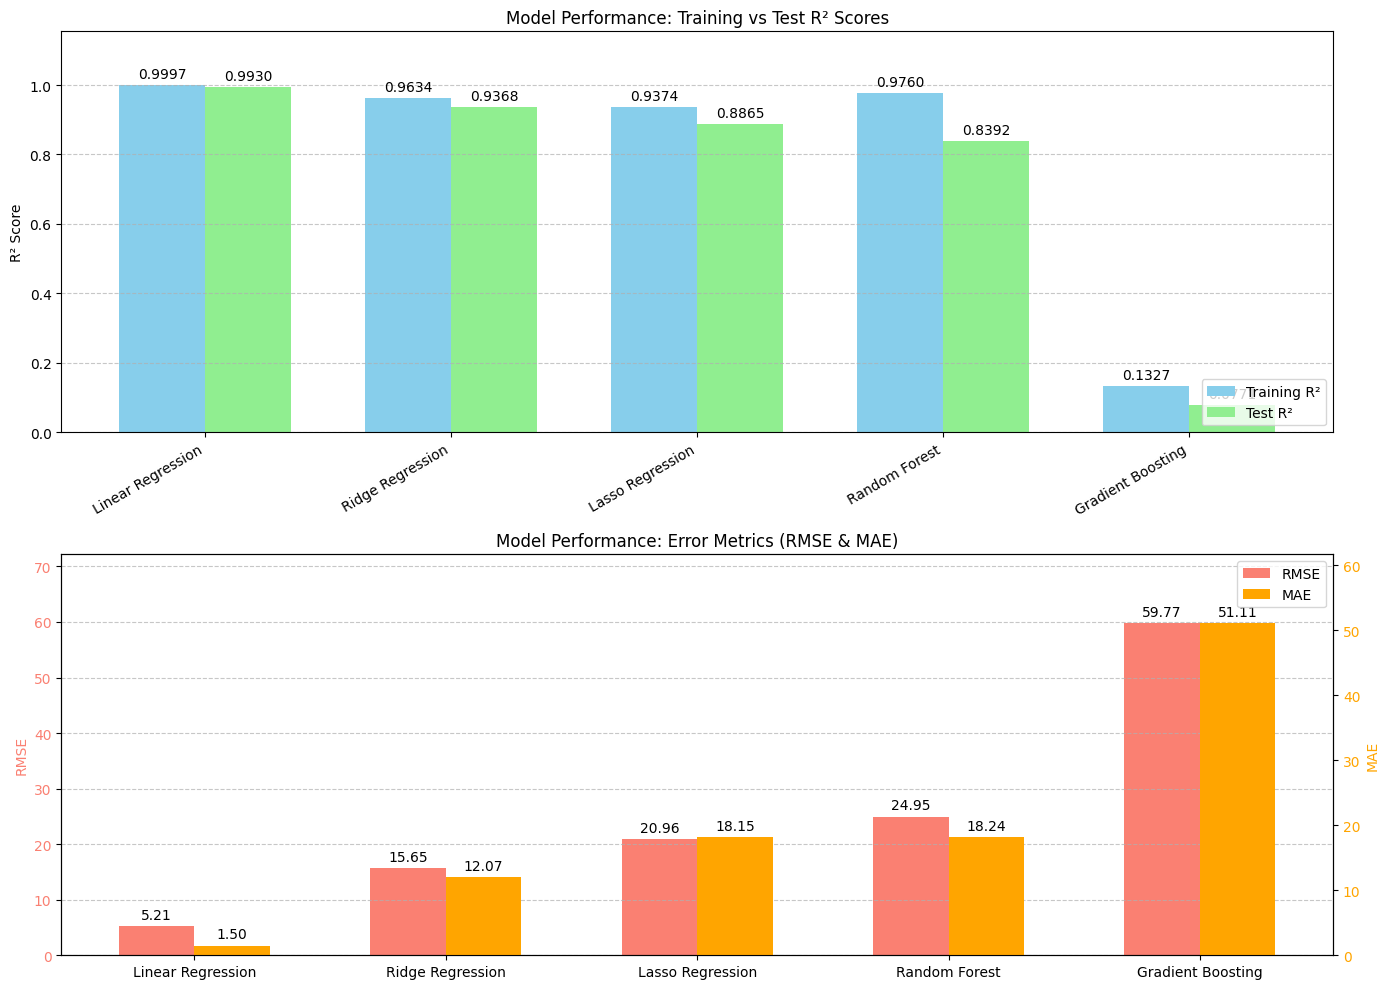

Best performing model based on Test R²: Linear Regression
Train R²    0.9997
Test R²     0.9930
RMSE        5.2079
MAE         1.5006
R² Diff     0.0067
Name: Linear Regression, dtype: float64

Overfitting Check (R² Diff > 0.1 indicates potential overfitting):
               Train R²  Test R²  R² Diff
Model                                    
Random Forest     0.976   0.8392   0.1369


In [26]:
# Visualize model performance comparison
plt.figure(figsize=(14, 10))

# 1. R² Comparison
plt.subplot(2, 1, 1)
x = np.arange(len(results_df.index))
width = 0.35

bars1 = plt.bar(x - width/2, results_df['Train R²'], width, label='Training R²', color='skyblue')
bars2 = plt.bar(x + width/2, results_df['Test R²'], width, label='Test R²', color='lightgreen')

# Add labels on bars
plt.bar_label(bars1, fmt='%.4f', padding=3)
plt.bar_label(bars2, fmt='%.4f', padding=3)

plt.ylabel('R² Score')
plt.ylim(top=plt.ylim()[1] * 1.1) # Adjust ylim to make space for labels
plt.title('Model Performance: Training vs Test R² Scores')
plt.xticks(x, results_df.index, rotation=30, ha='right')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Error Metrics (RMSE and MAE)
plt.subplot(2, 1, 2)
ax1 = plt.gca() # Get current axis
ax2 = ax1.twinx() # Create a twin axis for the second metric
width = 0.3

bars_rmse = ax1.bar(x - width/2, results_df['RMSE'], width, label='RMSE', color='salmon')
bars_mae = ax2.bar(x + width/2, results_df['MAE'], width, label='MAE', color='orange')

# Add labels on bars
ax1.bar_label(bars_rmse, fmt='%.2f', padding=3)
ax2.bar_label(bars_mae, fmt='%.2f', padding=3)

ax1.set_ylabel('RMSE', color='salmon')
ax2.set_ylabel('MAE', color='orange')
ax1.tick_params(axis='y', labelcolor='salmon')
ax2.tick_params(axis='y', labelcolor='orange')
ax1.set_ylim(top=ax1.get_ylim()[1] * 1.15)
ax2.set_ylim(top=ax2.get_ylim()[1] * 1.15)

plt.title('Model Performance: Error Metrics (RMSE & MAE)')
plt.xticks(x, results_df.index, rotation=30, ha='right')
# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Find the best model based on test R²
best_model_name = results_df['Test R²'].idxmax()
best_model_performance = results_df.loc[best_model_name]
print(f"Best performing model based on Test R²: {best_model_name}")
print(best_model_performance.round(4))

# Check for overfitting (significant drop from Train R² to Test R²)
print("\nOverfitting Check (R² Diff > 0.1 indicates potential overfitting):")
print(results_df[results_df['R² Diff'] > 0.1][['Train R²', 'Test R²', 'R² Diff']].round(4))

## 📈 10. Feature Importance & Explainability

Analyze feature importance from the best performing model.

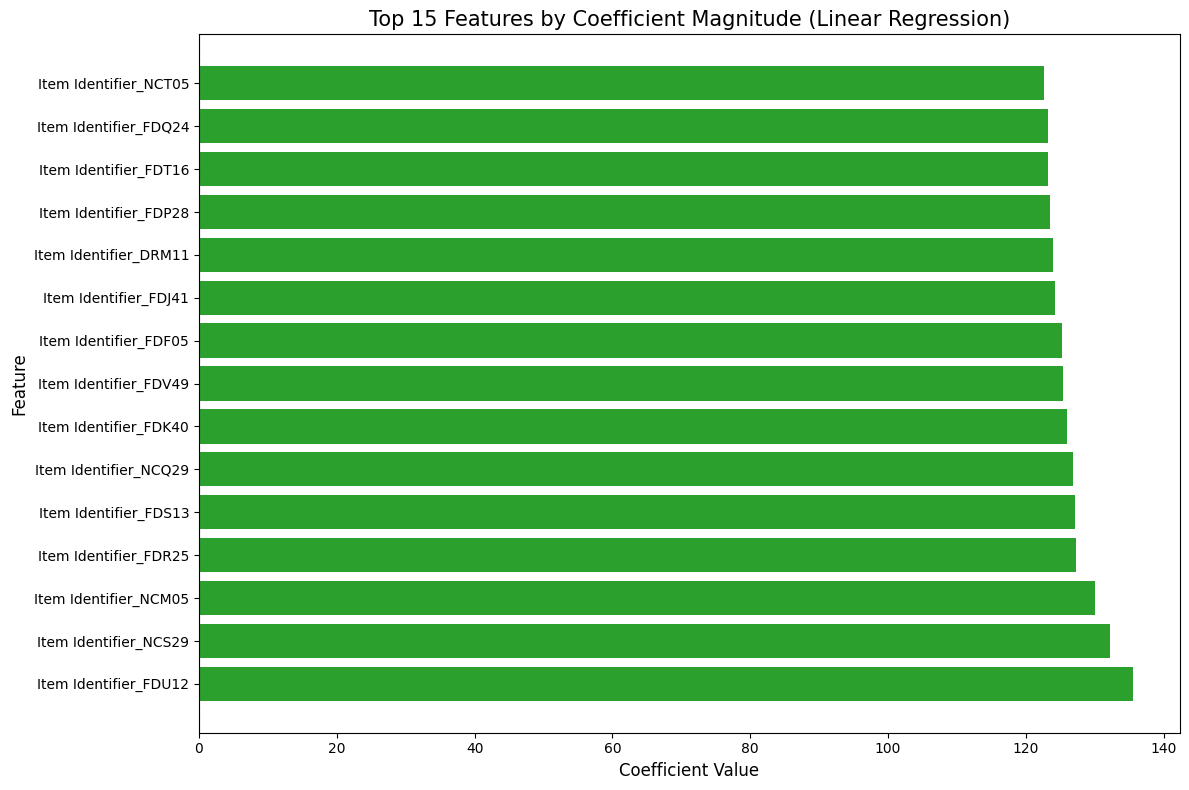


Top 10 Features:
                    Feature  Coefficient  AbsCoefficient
980   Item Identifier_FDU12     135.5783        135.5783
1485  Item Identifier_NCS29     132.1867        132.1867
1392  Item Identifier_NCM05     130.0746        130.0746
844   Item Identifier_FDR25     127.2362        127.2362
882   Item Identifier_FDS13     127.0719        127.0719
1460  Item Identifier_NCQ29     126.8507        126.8507
571   Item Identifier_FDK40     125.9584        125.9584
1061  Item Identifier_FDV49     125.3623        125.3623
366   Item Identifier_FDF05     125.2380        125.2380
536   Item Identifier_FDJ41     124.1824        124.1824


In [27]:
# Retrieve the best model object
best_model = models[best_model_name]

# Extract feature importance
feature_importance_df = None

if hasattr(best_model, 'feature_importances_'):
    # Tree-based models
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': final_feature_names if final_feature_names else X_train_final.columns, # Use retrieved names or fallback
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f'Top 15 Features by Importance ({best_model_name})', fontsize=15)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    # Linear models
    coefficients = best_model.coef_
    feature_importance_df = pd.DataFrame({
        'Feature': final_feature_names if final_feature_names else X_train_final.columns, # Use retrieved names or fallback
        'Coefficient': coefficients
    })
    feature_importance_df['AbsCoefficient'] = feature_importance_df['Coefficient'].abs()
    feature_importance_df = feature_importance_df.sort_values('AbsCoefficient', ascending=False)

    # Visualize feature coefficients
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = ['#2ca02c' if c > 0 else '#d62728' for c in top_features['Coefficient']] # Green for positive, Red for negative
    plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
    plt.title(f'Top 15 Features by Coefficient Magnitude ({best_model_name})', fontsize=15)
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    plt.show()
else:
    print(f"Could not extract feature importance/coefficients for model type: {best_model_name}")

if feature_importance_df is not None:
    print("\nTop 10 Features:")
    print(feature_importance_df.head(10).round(4))

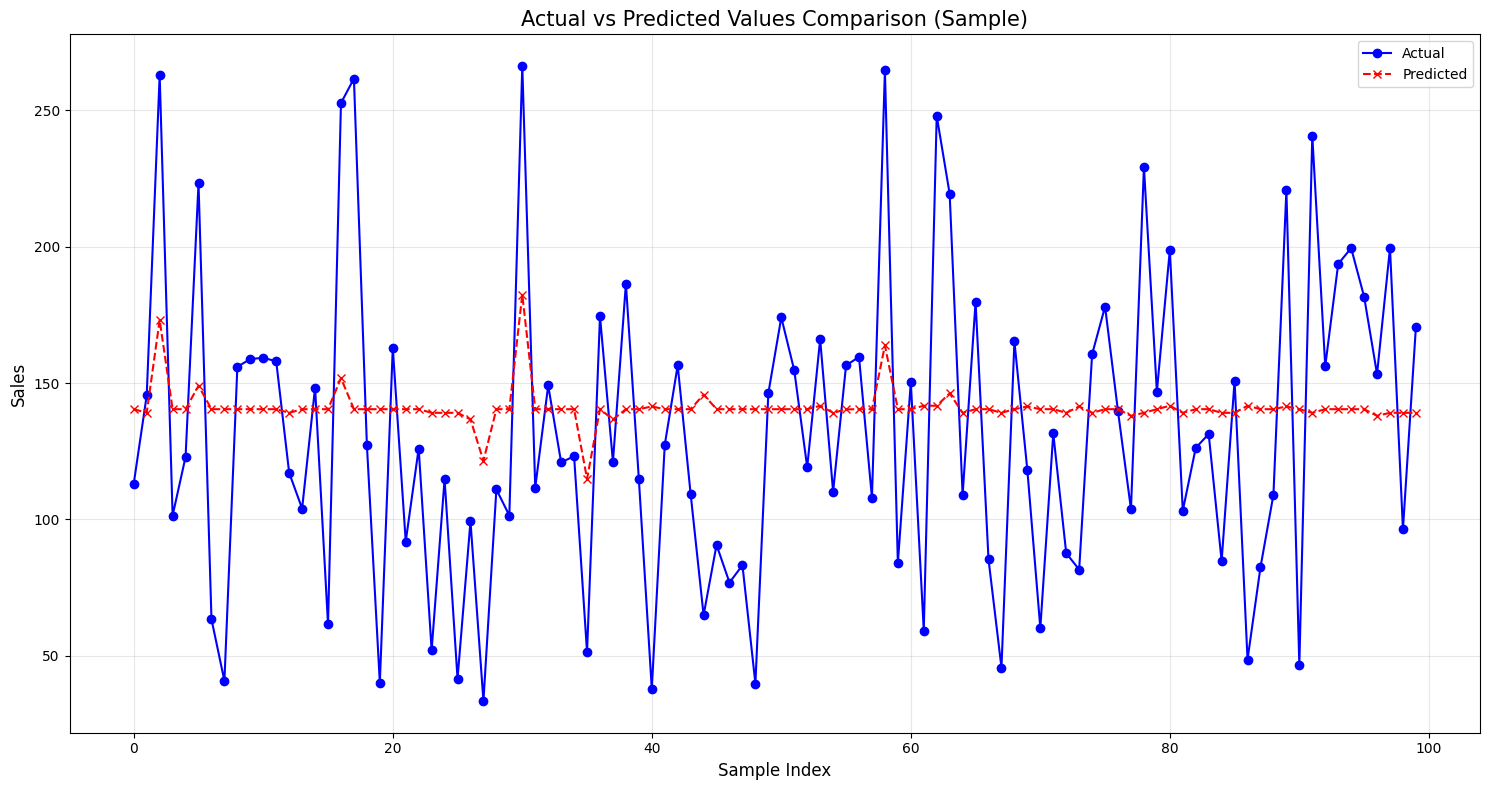

<ipython-input-28-73521cfd35cf>:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_errors = mean_errors.groupby('Bin')['Error'].mean()


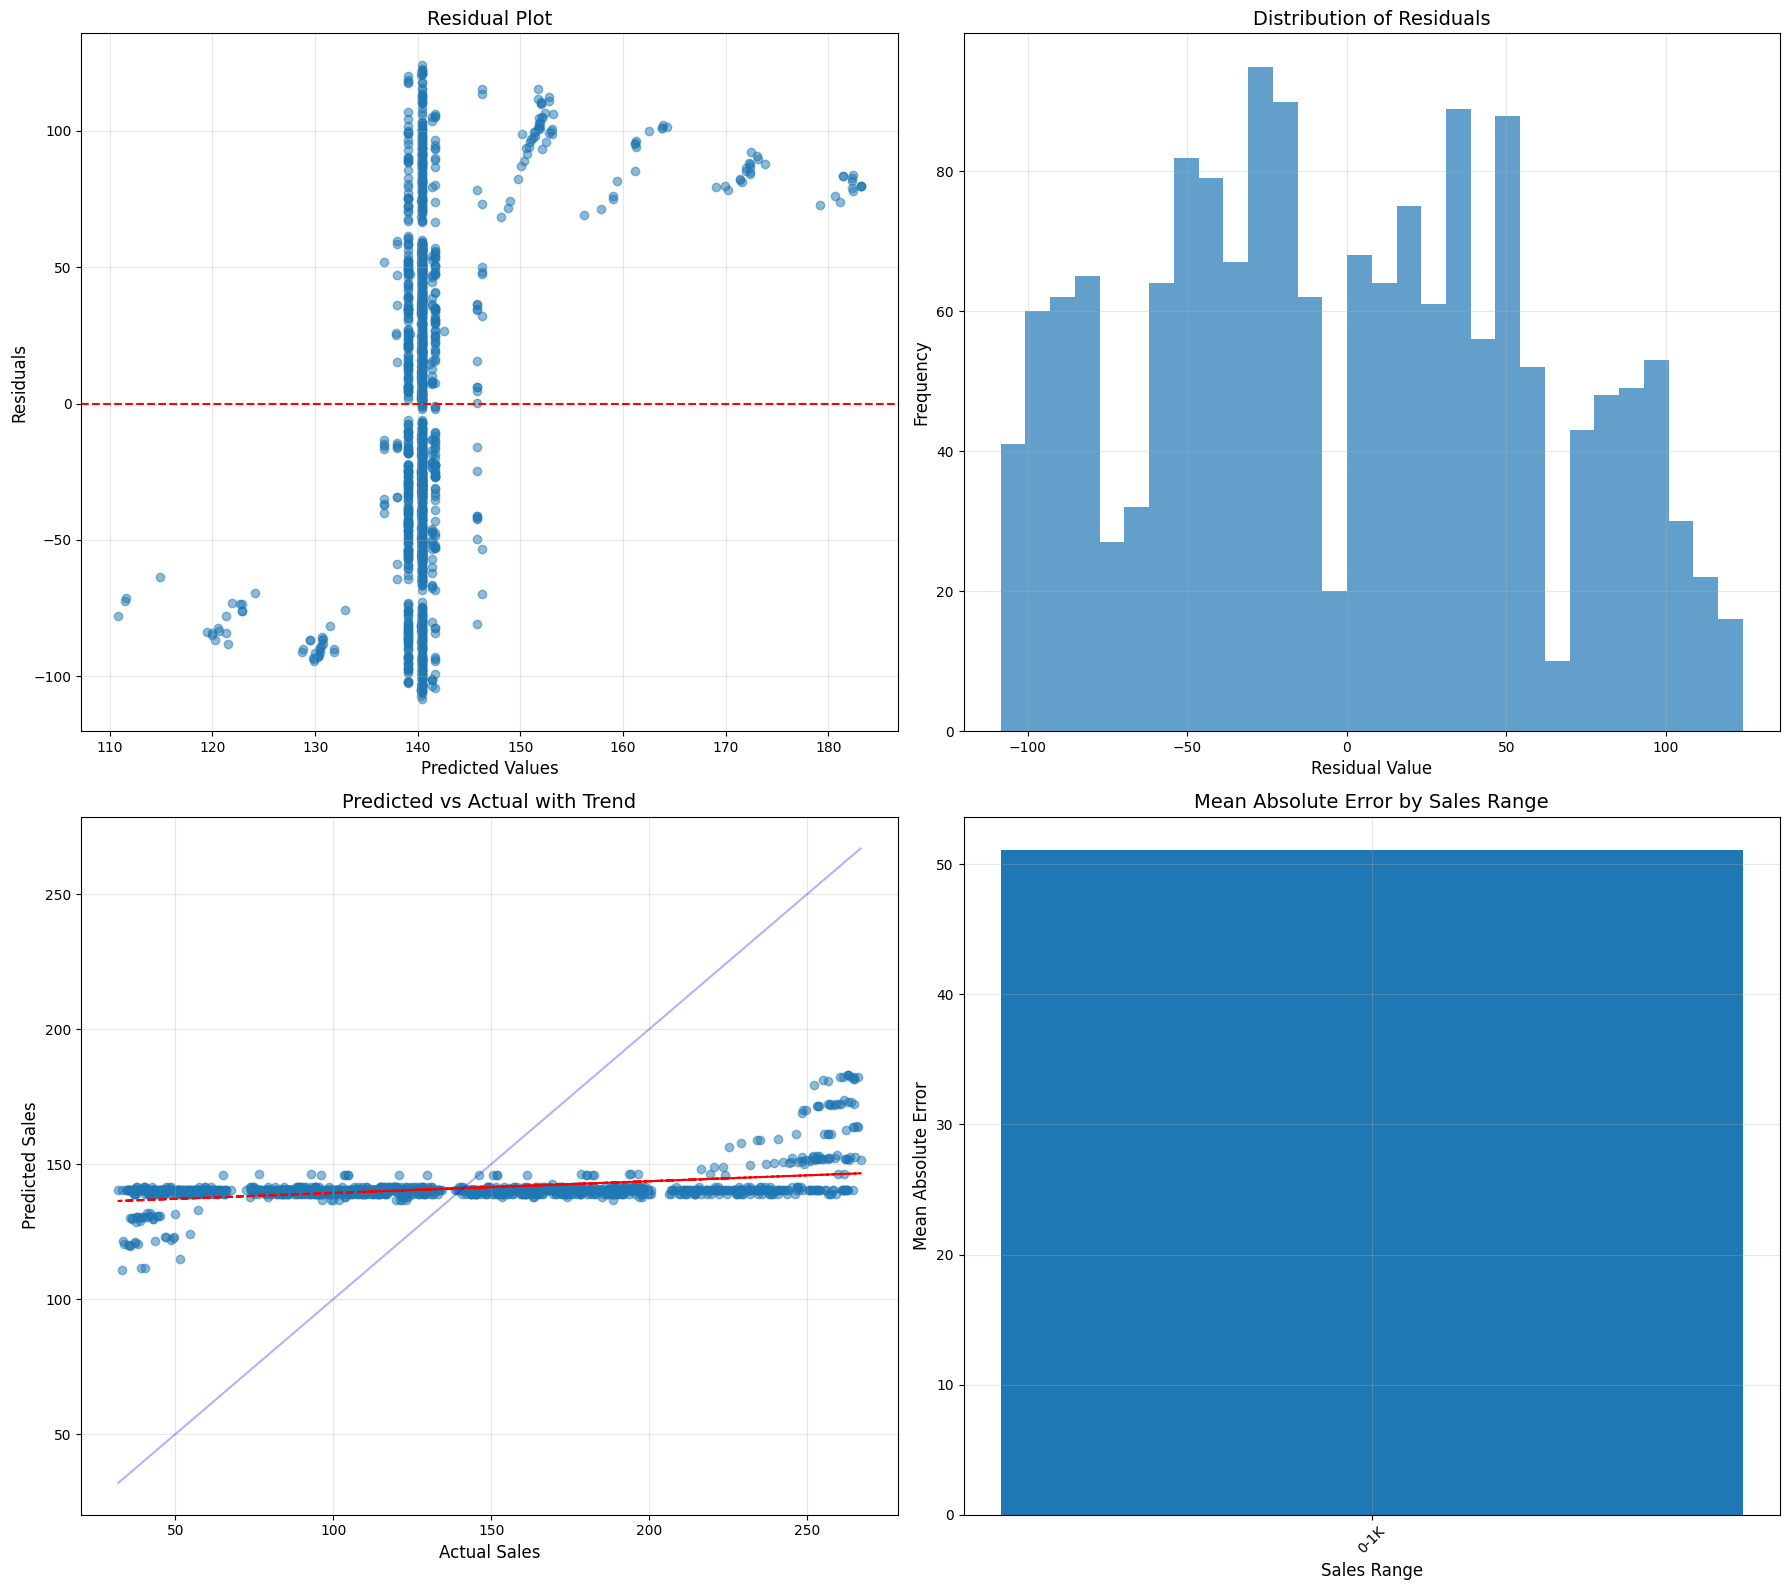


Model Performance by Sales Range:
Sales Range  Count         MSE      RMSE     MAE
       0-1K   1670 3572.773551 59.772682 51.1116


In [28]:
# Create a more detailed visualization of actual vs predicted values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sample 100 random data points for more clear visualization
sample_size = 100
if len(y_test) > sample_size:
    sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
    sample_actual = y_test.iloc[sample_indices].reset_index(drop=True)
    sample_pred = y_test_pred[sample_indices]
else:
    sample_actual = y_test.reset_index(drop=True)
    sample_pred = y_test_pred

# Create a DataFrame for the sampled points
sample_df = pd.DataFrame({
    'Index': range(len(sample_actual)),
    'Actual': sample_actual,
    'Predicted': sample_pred
})

# Create a line plot comparing actual vs predicted values
plt.figure(figsize=(15, 8))
plt.plot(sample_df['Index'], sample_df['Actual'], marker='o', linestyle='-', label='Actual', color='blue')
plt.plot(sample_df['Index'], sample_df['Predicted'], marker='x', linestyle='--', label='Predicted', color='red')
plt.title('Actual vs Predicted Values Comparison (Sample)', fontsize=15)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a 2x2 subplot with different visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# 1. Residual plot
residuals = y_test - y_test_pred
axes[0, 0].scatter(y_test_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_title('Residual Plot', fontsize=14)
axes[0, 0].set_xlabel('Predicted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of residuals
axes[0, 1].hist(residuals, bins=30, alpha=0.7)
axes[0, 1].set_title('Distribution of Residuals', fontsize=14)
axes[0, 1].set_xlabel('Residual Value', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 3. Actual vs Predicted scatter plot with regression line
axes[1, 0].scatter(y_test, y_test_pred, alpha=0.5)
# Calculate and plot regression line
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
axes[1, 0].plot(y_test, p(y_test), "r--")
# Plot perfect prediction line
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-', alpha=0.3)
axes[1, 0].set_title('Predicted vs Actual with Trend', fontsize=14)
axes[1, 0].set_xlabel('Actual Sales', fontsize=12)
axes[1, 0].set_ylabel('Predicted Sales', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# 4. Error distribution by actual value ranges
bins = [0, 1000, 2000, 3000, 4000, 5000, 10000]
bin_labels = ['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K', '5K+']
y_test_binned = pd.cut(y_test, bins=bins, labels=bin_labels)
mean_errors = pd.DataFrame({'Actual': y_test, 'Error': abs(residuals), 'Bin': y_test_binned})
mean_errors = mean_errors.groupby('Bin')['Error'].mean()

axes[1, 1].bar(mean_errors.index, mean_errors.values)
axes[1, 1].set_title('Mean Absolute Error by Sales Range', fontsize=14)
axes[1, 1].set_xlabel('Sales Range', fontsize=12)
axes[1, 1].set_ylabel('Mean Absolute Error', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display the prediction accuracy for different ranges of sales values
def calc_bin_metrics(actual, predicted, bins, labels):
    binned_data = pd.DataFrame({'Actual': actual, 'Predicted': predicted})
    binned_data['Bin'] = pd.cut(actual, bins=bins, labels=labels)

    metrics = []
    for bin_name in labels:
        bin_data = binned_data[binned_data['Bin'] == bin_name]
        if len(bin_data) > 0:
            mse = mean_squared_error(bin_data['Actual'], bin_data['Predicted'])
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(bin_data['Actual'], bin_data['Predicted'])
            count = len(bin_data)
            metrics.append([bin_name, count, mse, rmse, mae])

    return pd.DataFrame(metrics, columns=['Sales Range', 'Count', 'MSE', 'RMSE', 'MAE'])

# Calculate metrics by sales range
bin_metrics = calc_bin_metrics(y_test, y_test_pred, bins, bin_labels)

# Print binned metrics
print("\nModel Performance by Sales Range:")
print(bin_metrics.to_string(index=False))